In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=7
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's break down the given Hamiltonian to answer the questions.

The Hamiltonian is given as:

$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

And there are two additional terms:

$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$

$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

The energy dispersion is defined as:

$E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

And the interaction potential $U_{s,s'}(\bm{k})$ is defined as:

$U_{s,s'}(\bm{k})=\sum_{\bm{n}} U(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$, where $\bm{n}$ is the summation of all hopping pairs.

Let's answer the questions:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, we see that the main index for the operators $c$ and $c^\dagger$ is the sp

In [7]:
print(generated_code['thinking'])

Let's break down the given Hamiltonian to answer the questions.

The Hamiltonian is given as:

$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

And there are two additional terms:

$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$

$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

The energy dispersion is defined as:

$E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

And the interaction potential $U_{s,s'}(\bm{k})$ is defined as:

$U_{s,s'}(\bm{k})=\sum_{\bm{n}} U(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$, where $\bm{n}$ is the summation of all hopping pairs.

Let's answer the questions:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, we see that the main index for the operators $c$ and $c^\dagger$ is the spin $s$ and the momentum $\bm{k}$. The operators are o

In [8]:
print(generated_code['text'])

# Analysis of the Hamiltonian

Looking at the given Hamiltonian equation, I'll break it down systematically to implement the Hartree-Fock method for a triangular lattice.

## QUESTION 1: Dimension and Basis Order

From the Hamiltonian, we can see operators of the form `c_{k,s}` where `k` is momentum and `s` is spin. This indicates we have a spin degree of freedom.

Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

## QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `\langle c_{k,s}^\dagger c_{k,s}\rangle`: Mean density of spin s at momentum k (for Hartree term)
- `\langle c_{k,s}^\dagger c_{k,s'} \rangle`: Spin-flip expectation value (for Fock term)

TERMS:
- `-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}` → H[s, s, k], NI (non-interacting)
- `\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}` → H[s', s', k'], I (interacting)
- `-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Implements a Hartree-Fock Hamiltonian for a system on a triangular lattice with
    hopping and interaction terms.
    
    The Hamiltonian includes:
    - Non-interacting term: -sum_s sum_k E_s(k) c_k,s^dagger c_k,s
    - Hartree term: (1/N) * sum_s,s' sum_k,k' U(0) <c_k,s^dagger c_k,s> c_k',s'^dagger c_k',s'
    - Fock term: -(1/N) * sum_s,s' sum_k,q U(k-q) <c_k,s^dagger c_k,s'> c_q,s'^dagger c_q,s
    
    Args:
      N_shell: Number of shells in the first Brillouin zone.
      parameters: Dictionary containing model parameters.
      filling_factor: Filling factor for the system. Default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t': 1.0, 'U': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # 2 spin states
        self.basis_order = {'0': 'spin'}  # up, down

        # Occupancy relevant parameters


In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_7.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

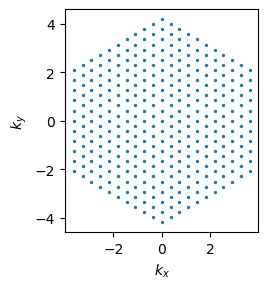

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

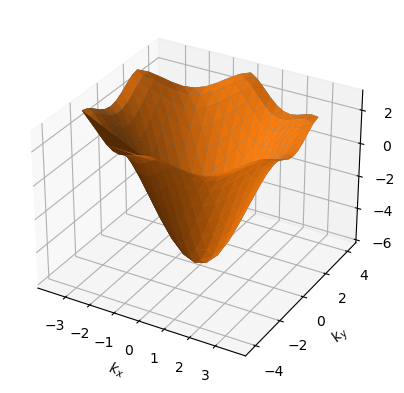

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

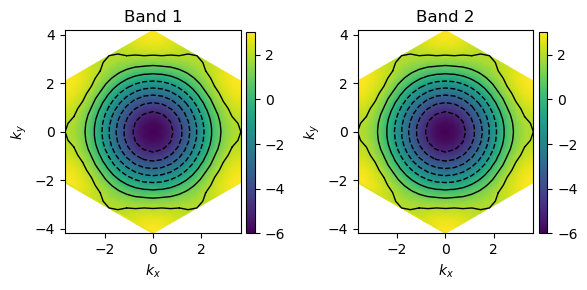

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


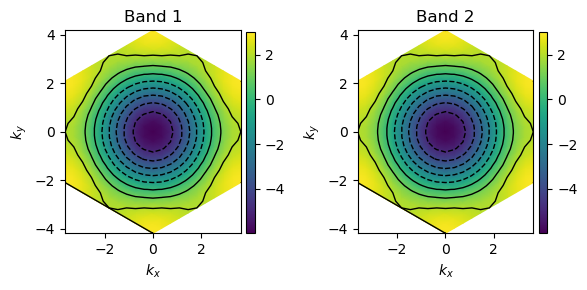

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


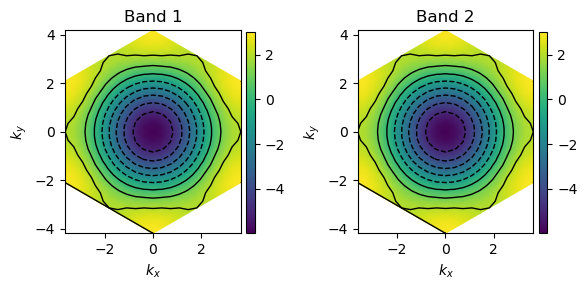

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -9.00
U/T is 0.00
mean_U is 0.00


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and determine if it correctly represents a momentum space mesh in the first Brillouin zone for a triangular lattice, focusing on the point group symmetry as specified in the rubric.

First, I'll identify what the image shows:
- The image displays a hexagonal arrangement of dots in momentum (k) space
- The x-axis is labeled k_x and ranges approximately from -3 to 3
- The y-axis is labeled k_y and ranges approximately from -4 to 4
- The dots form a regular hexagonal pattern in the k-space

For a triangular lattice:
1. The real space lattice is triangular (with 6-fold rotational symmetry)
2. The reciprocal lattice (momentum space) should have a hexagonal first Brillouin zone

Checking the requirements in the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image indeed shows a momentum space mesh
   - The arrangement is hexagonal, which is th

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and evaluate it according to the rubric for a triangular lattice band structure calculation using Hartree-Fock method.

The image shows two false color plots with contour lines labeled "Band 1" and "Band 2", representing the band structure in the first Brillouin zone.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, the Brillouin zone boundary appears to have a hexagonal shape. This is correct for a triangular lattice, as the first Brillouin zone of a triangular lattice is hexagonal. The boundary of the colored region in both Band 1 and Band 2 plots shows a clear hexagonal shape.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear to be a

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image to evaluate whether it correctly shows the band structure for a triangular lattice after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let's go through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary appears to have a hexagonal shape, which is indeed what is expected for a triangular lattice. The first Brillouin zone of a triangular lattice should be a regular hexagon, and the boundary shown in the plots appears to be hexagonal. This point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)

The highest energy regions (yellow) appear to be at the corners of the hexagonal Brillouin zone. This is consistent with wha

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

Let me analyze this image based on the provided rubric:

1. **Shape of the Brillouin zone boundary**:
   In the image, I can see that the Brillouin zone boundary forms a hexagon, which is the expected shape for a triangular lattice. The hexagonal boundary is clearly visible in both Band 1 and Band 2 plots, with corners at the points where the yellow regions extend outward. This is correct for a triangular lattice.

2. **Symmetry of the energy distribution**:
   2.1 The highest energy regions (yellow) are located at the corners of the hexagonal Brillouin zone.
   2.2 The energy variation pattern shows a clear radial distribution, with energy decreasing as we move from the corners toward the center. The center (where kx=0, ky=0) appears to have the lowest energy (dark purple).
   2.3 The energy distribution appears to have 6-fold rotational symmetry (C6 symmetry) and mirror symmetry along multiple axes. This is consistent with the symm

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '7' saved to final_answer.yaml
